In [1]:
_year='2023'

In [3]:
import time
import pandas as  pd

filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\'
filename = '출퇴근대여반납차이_' + _year + '.parquet'
start_time = time.time()
df = pd.read_parquet(filepath + filename)
print("read_parquet time :", time.time() - start_time)
df.head(5)

read_parquet time : 0.895897388458252


,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
0,00003,NaN,536.0,NaN,10.0,None,None,NaN,NaN
1,00005,NaN,20.0,NaN,5.0,None,None,NaN,NaN
2,00102,2057.0,1968.0,4286.0,5301.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629
3,00103,1121.0,1441.0,3217.0,4540.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835
4,00104,919.0,1555.0,2691.0,2292.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2793 non-null   object 
 1   출근대여수   2784 non-null   float64
 2   출근반납수   2791 non-null   float64
 3   퇴근대여수   2787 non-null   float64
 4   퇴근반납수   2789 non-null   float64
 5   대여소명    2785 non-null   object 
 6   상세주소    2785 non-null   object 
 7   위도      2785 non-null   float64
 8   경도      2785 non-null   float64
dtypes: float64(6), object(3)
memory usage: 196.5+ KB


In [7]:
df.shape

(2793, 9)

In [9]:
df.isnull().sum()

대여소번호    0
출근대여수    9
출근반납수    2
퇴근대여수    6
퇴근반납수    4
대여소명     8
상세주소     8
위도       8
경도       8
dtype: int64

### null 값이 있는 모든 행 확인하기

In [11]:
df[df.isnull().any(axis=1)]

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
0,00003,NaN,536.0,NaN,10.0,None,None,NaN,NaN
1,00005,NaN,20.0,NaN,5.0,None,None,NaN,NaN
2349,04339,NaN,NaN,2.0,1.0,None,None,NaN,NaN
2372,04394,NaN,28.0,24.0,NaN,서울시립24시간게스트하우스,성동구 송정동 73-1113,37.554333,127.058228
2737,05330,6.0,NaN,8.0,12.0,구립수락노인복지관,노원구 수락산로 214,37.671253,127.054749
2787,06172,NaN,2.0,3.0,5.0,가양5단지아파트,강서구 가양동1481,37.564480,126.854645
2788,09980,2.0,1.0,50.0,34.0,None,None,NaN,NaN
2789,09997,NaN,125.0,NaN,NaN,None,None,NaN,NaN
2790,09998,NaN,31.0,NaN,11.0,None,None,NaN,NaN
2791,88888,NaN,2.0,NaN,NaN,None,None,NaN,NaN


### 대여소명, 위경도 null값이 데이터 행 삭제하기

In [13]:
df = df.dropna(subset=['대여소명'])
df 

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
2,00102,2057.0,1968.0,4286.0,5301.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629
3,00103,1121.0,1441.0,3217.0,4540.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835
4,00104,919.0,1555.0,2691.0,2292.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986
5,00105,252.0,285.0,1374.0,1409.0,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825
6,00106,1093.0,1307.0,3746.0,4436.0,합정역 7번출구 앞,서울특별시 마포구 독막로 4,37.548645,126.912826
...,...,...,...,...,...,...,...,...,...
2783,06053,133.0,145.0,373.0,271.0,중부세무서 앞,서울특별시 중구 남학동 12-1,37.560925,126.990662
2784,06054,2159.0,529.0,1032.0,2236.0,청구e편한세상아파트 113동 앞,신당동 44-40,37.561043,127.018211
2785,06055,222.0,413.0,367.0,172.0,한국경제,중구 청파로 463,37.560627,126.967682
2786,06171,36.0,26.0,129.0,126.0,월드빌딩 앞,화곡동 1066-8,37.540981,126.837433


In [15]:
df[df.isnull().any(axis=1)]

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
2372,04394,NaN,28.0,24.0,NaN,서울시립24시간게스트하우스,성동구 송정동 73-1113,37.554333,127.058228
2737,05330,6.0,NaN,8.0,12.0,구립수락노인복지관,노원구 수락산로 214,37.671253,127.054749
2787,06172,NaN,2.0,3.0,5.0,가양5단지아파트,강서구 가양동1481,37.564480,126.854645


### 출근대여수, 퇴근대여수 중 하나라도 null값인 데이터 삭제

In [27]:
df = df.dropna(subset=['출근대여수', '퇴근반납수', '출근반납수', '퇴근대여수'])

In [29]:
df.isnull().sum()

대여소번호    0
출근대여수    0
출근반납수    0
퇴근대여수    0
퇴근반납수    0
대여소명     0
상세주소     0
위도       0
경도       0
dtype: int64

In [31]:
df[df.isnull().any(axis=1)]

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도


In [33]:
df.shape

(2782, 9)

In [35]:
df

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
2,00102,2057.0,1968.0,4286.0,5301.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629
3,00103,1121.0,1441.0,3217.0,4540.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835
4,00104,919.0,1555.0,2691.0,2292.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986
5,00105,252.0,285.0,1374.0,1409.0,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825
6,00106,1093.0,1307.0,3746.0,4436.0,합정역 7번출구 앞,서울특별시 마포구 독막로 4,37.548645,126.912826
...,...,...,...,...,...,...,...,...,...
2782,05871,470.0,69.0,264.0,332.0,건영상가 앞,도림로323,37.506119,126.901611
2783,06053,133.0,145.0,373.0,271.0,중부세무서 앞,서울특별시 중구 남학동 12-1,37.560925,126.990662
2784,06054,2159.0,529.0,1032.0,2236.0,청구e편한세상아파트 113동 앞,신당동 44-40,37.561043,127.018211
2785,06055,222.0,413.0,367.0,172.0,한국경제,중구 청파로 463,37.560627,126.967682


## 퇴근반납수 - 출근대여수 높은 대여소 추출하기

In [37]:
df['퇴근반납수-출근대여수'] = df['퇴근반납수'] - df['출근대여수']
df

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도,퇴근반납수-출근대여수
2,00102,2057.0,1968.0,4286.0,5301.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,3244.0
3,00103,1121.0,1441.0,3217.0,4540.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,3419.0
4,00104,919.0,1555.0,2691.0,2292.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,1373.0
5,00105,252.0,285.0,1374.0,1409.0,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,1157.0
6,00106,1093.0,1307.0,3746.0,4436.0,합정역 7번출구 앞,서울특별시 마포구 독막로 4,37.548645,126.912826,3343.0
...,...,...,...,...,...,...,...,...,...,...
2782,05871,470.0,69.0,264.0,332.0,건영상가 앞,도림로323,37.506119,126.901611,-138.0
2783,06053,133.0,145.0,373.0,271.0,중부세무서 앞,서울특별시 중구 남학동 12-1,37.560925,126.990662,138.0
2784,06054,2159.0,529.0,1032.0,2236.0,청구e편한세상아파트 113동 앞,신당동 44-40,37.561043,127.018211,77.0
2785,06055,222.0,413.0,367.0,172.0,한국경제,중구 청파로 463,37.560627,126.967682,-50.0


In [39]:
top_20 = df.nlargest(20, '퇴근반납수-출근대여수')
top_20

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도,퇴근반납수-출근대여수
1773,02728,14718.0,13315.0,16771.0,31336.0,마곡나루역 3번 출구,강서구 마곡동 372-23,37.565804,126.828079,16618.0
806,01153,6944.0,5944.0,13262.0,22085.0,"발산역 1번, 9번 인근 대여소",서울특별시 강서구 공항대로 281,37.558949,126.837174,15141.0
2290,04217,2851.0,2141.0,8058.0,12551.0,한강공원 망원나들목,마포구 망원동 462-8,37.555576,126.896889,9700.0
2770,05858,6965.0,4436.0,5734.0,16228.0,영등포역5번출구,경인로 846,37.516693,126.908073,9263.0
1413,02102,3928.0,6141.0,9493.0,12535.0,봉림교 교통섬,서울특별시 관악구 관천로 52,37.484085,126.926888,8607.0
2462,04565,2119.0,4335.0,9579.0,9714.0,영등포 신세계백화점,영등포구 영등포4가 442-6,37.518036,126.903648,7595.0
525,00765,3499.0,5777.0,8909.0,11051.0,오목교역 3번출구,서울특별시 양천구 목동동로 270,37.524776,126.875481,7552.0
546,00792,1764.0,7136.0,9886.0,8300.0,목동트라팰리스 웨스턴에비뉴,오목로299(이마트 출입구측),37.525372,126.870926,6536.0
509,00746,1636.0,1962.0,5714.0,7543.0,목동2단지 상가,서울특별시 양천구 목동 902-5,37.536503,126.877747,5907.0
334,00502,6446.0,10696.0,11585.0,12223.0,뚝섬유원지역 1번출구 앞,서울특별시 광진구 능동로 10 뚝섬유원지역 1번출구 앞,37.531860,127.067192,5777.0


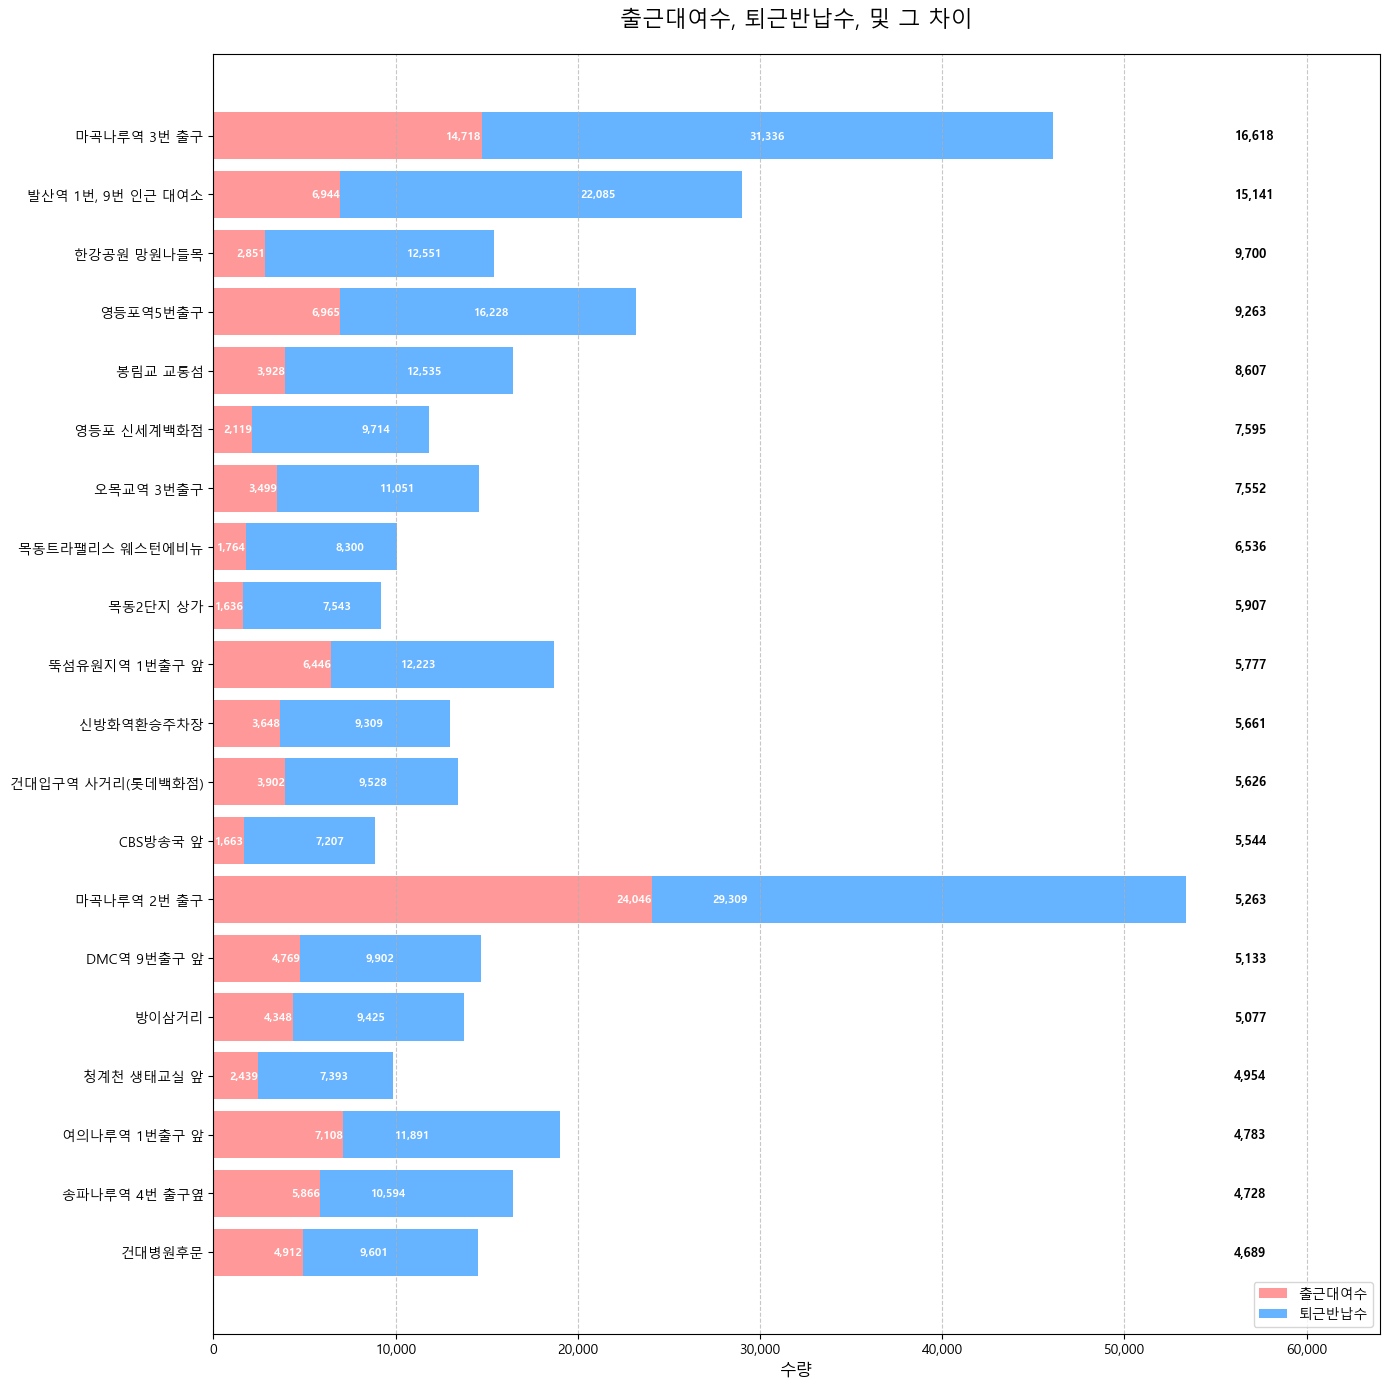

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 그래프 생성 (가로 세로 비율 조정)
fig, ax = plt.subplots(figsize=(14, 14))  # 가로 길이를 늘림

# 데이터 정렬 및 차이 계산
top_20_sorted = top_20.sort_values('퇴근반납수-출근대여수', ascending=True)
top_20_sorted['차이'] = top_20_sorted['퇴근반납수'] - top_20_sorted['출근대여수']

# 색상 설정
colors = ['#ff9999', '#66b3ff']

# 막대 그리기
ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], label='출근대여수', color=colors[0])
ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], left=top_20_sorted['출근대여수'], label='퇴근반납수', color=colors[1])

# 그래프 스타일링
ax.set_xlabel('수량', fontsize=12)
ax.set_title('출근대여수, 퇴근반납수, 및 그 차이', fontsize=16, pad=20)
ax.legend(loc='lower right', fontsize=10)

# y축 레이블 정렬
plt.yticks(rotation=0, ha='right')

# x축에 천 단위 구분자 추가
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# 그리드 추가
ax.grid(axis='x', linestyle='--', alpha=0.7)

# 각 막대에 값 표시
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width):,}',
                ha='right', va='center', fontweight='bold', fontsize=8, color='white')

bars1 = ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], color=colors[0])
bars2 = ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], left=top_20_sorted['출근대여수'], color=colors[1])

add_value_labels(bars1)
add_value_labels(bars2)

# 차이 값 표시 (가장 오른쪽에)
max_value = top_20_sorted[['출근대여수', '퇴근반납수']].sum(axis=1).max()
for i, value in enumerate(top_20_sorted['차이']):
    ax.text(max_value * 1.05, i, f'{int(value):,}', 
            va='center', ha='left', fontweight='bold', fontsize=9)

# x축 범위 조정
ax.set_xlim(0, max_value * 1.2)

plt.tight_layout()
plt.show()